In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv("data/hr/human-resources-analytics.zip",compression='zip')

In [3]:
df.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
sales                     object
salary                    object
dtype: object

In [4]:
df.isnull().sum()*100/len(df)

satisfaction_level       0.0
last_evaluation          0.0
number_project           0.0
average_montly_hours     0.0
time_spend_company       0.0
Work_accident            0.0
left                     0.0
promotion_last_5years    0.0
sales                    0.0
salary                   0.0
dtype: float64

In [8]:
len(df.columns)

10

In [5]:
df.describe(include='all')

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999,14999
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sales,low
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4140,7316
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,NaN,NaN
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,NaN,NaN
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,NaN,NaN


In [6]:
len(df)

14999

In [12]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [11]:
df.sales.value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: sales, dtype: int64

In [10]:
df.left.value_counts()*100/len(df)

0    76.191746
1    23.808254
Name: left, dtype: float64

In [9]:
df.salary.value_counts()/len(df)

low       0.487766
medium    0.429762
high      0.082472
Name: salary, dtype: float64

In [13]:
df1 = df[df['left']==0]
df1.salary.value_counts()*100/len(df1)

low       45.012251
medium    44.880994
high      10.106755
Name: salary, dtype: float64

In [14]:
df1 = df[df['left']==1]
df1.salary.value_counts()*100/len(df1)

low       60.823299
medium    36.880426
high       2.296276
Name: salary, dtype: float64

In [15]:
salary_map = {'low':1,'medium':2,'high':3}
df['salary_int'] = df.salary.map(salary_map)

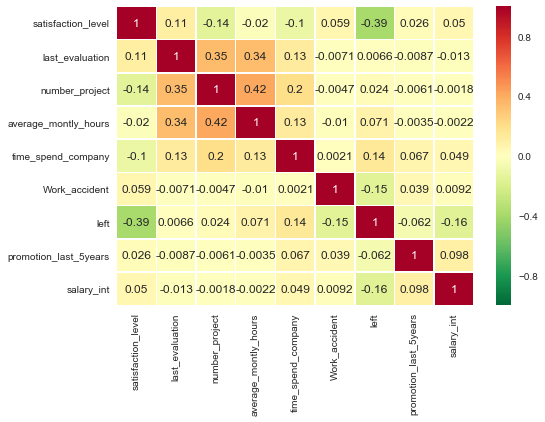

In [16]:
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn_r', linewidths=0.5)

In [17]:
cols = ['sales','satisfaction_level']
df1 = df[df['left']==1]
df_grp = df1[cols].groupby(['sales'])
dx = df_grp.agg([len,np.sum,np.max,np.min,np.mean,np.std])
dx.columns = pd.MultiIndex.droplevel(dx.columns,0)
dx['pct_sat'] = dx['sum']*100/dx['len'].sum()
dx['left'] = 1
dx

,len,sum,amax,amin,mean,std,pct_sat,left
sales,,,,,,,,
IT,273.0,112.44,0.92,0.09,0.411868,0.271041,3.148698,1
RandD,121.0,52.37,0.92,0.09,0.432810,0.282230,1.466536,1
accounting,204.0,82.13,0.91,0.09,0.402598,0.256977,2.299916,1
hr,215.0,93.18,0.91,0.09,0.433395,0.243090,2.609353,1
management,91.0,38.48,0.90,0.09,0.422857,0.270248,1.077569,1
marketing,203.0,91.99,0.90,0.09,0.453153,0.249197,2.576029,1
product_mng,198.0,95.35,0.91,0.09,0.481566,0.264036,2.670120,1
sales,1014.0,453.93,0.92,0.09,0.447663,0.258455,12.711565,1
support,555.0,250.25,0.91,0.09,0.450901,0.263695,7.007841,1


In [18]:
cols = ['sales','satisfaction_level']
df1 = df[df['left']==0]
df_grp = df1[cols].groupby(['sales'])
dy = df_grp.agg([len,np.sum,np.max,np.min,np.mean,np.std])
dy.columns = pd.MultiIndex.droplevel(dy.columns,0)
dy['pct_sat'] = dy['sum']*100/dy['len'].sum()
dy['left'] = 0
dy

,len,sum,amax,amin,mean,std,pct_sat,left
sales,,,,,,,,
IT,954.0,646.02,1.0,0.12,0.677170,0.209040,5.652958,0
RandD,666.0,435.43,1.0,0.12,0.653799,0.221831,3.810203,0
accounting,563.0,364.38,1.0,0.12,0.647211,0.221350,3.188484,0
hr,524.0,349.34,1.0,0.13,0.666679,0.216091,3.056878,0
management,539.0,352.97,1.0,0.12,0.654861,0.201581,3.088642,0
marketing,655.0,438.77,1.0,0.12,0.669878,0.218826,3.839429,0
product_mng,704.0,463.56,1.0,0.13,0.658466,0.220944,4.056353,0
sales,3126.0,2089.88,1.0,0.12,0.668548,0.222123,18.287364,0
support,1674.0,1127.94,1.0,0.12,0.673799,0.213199,9.869968,0


In [19]:
dz = pd.concat([dx,dy])
dz.sort_index()

,len,sum,amax,amin,mean,std,pct_sat,left
sales,,,,,,,,
IT,273.0,112.44,0.92,0.09,0.411868,0.271041,3.148698,1
IT,954.0,646.02,1.00,0.12,0.677170,0.209040,5.652958,0
RandD,121.0,52.37,0.92,0.09,0.432810,0.282230,1.466536,1
RandD,666.0,435.43,1.00,0.12,0.653799,0.221831,3.810203,0
accounting,204.0,82.13,0.91,0.09,0.402598,0.256977,2.299916,1
accounting,563.0,364.38,1.00,0.12,0.647211,0.221350,3.188484,0
hr,215.0,93.18,0.91,0.09,0.433395,0.243090,2.609353,1
hr,524.0,349.34,1.00,0.13,0.666679,0.216091,3.056878,0
management,91.0,38.48,0.90,0.09,0.422857,0.270248,1.077569,1


In [22]:
#df.pivot_table(aggfunc=len,index=['sales'])
#df.pivot_table(aggfunc=len,index=['sales'],columns=['left'],values=['satisfaction_level'])
df.pivot_table(aggfunc=len,index=['sales'],columns=['salary','left'],values=['satisfaction_level'])

satisfaction_level                                    
salary                    high           low         medium       
left                         0     1       0      1       0      1
sales                                                             
IT                        79.0   4.0   437.0  172.0   438.0   97.0
RandD                     47.0   4.0   309.0   55.0   310.0   62.0
accounting                69.0   5.0   259.0   99.0   235.0  100.0
hr                        39.0   6.0   243.0   92.0   242.0  117.0
management               224.0   1.0   121.0   59.0   194.0   31.0
marketing                 71.0   9.0   276.0  126.0   308.0   68.0
product_mng               62.0   6.0   346.0  105.0   296.0   87.0
sales                    255.0  14.0  1402.0  697.0  1469.0  303.0
support                  133.0   8.0   757.0  389.0   784.0  158.0
technical                176.0  25.0   994.0  378.0   853.0  294.0

### Using RandomForest Classifier for predection

In [23]:
df_final = df.drop(['salary'],axis=1).copy()

In [30]:
df_final = pd.get_dummies(df_final,columns=['sales'])

ValueError: labels ['sales'] not contained in axis

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
y = df_final['left']
X = df_final.drop(['left'],axis=1)

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [33]:
from sklearn.ensemble import RandomForestClassifier

In [34]:
clf = RandomForestClassifier()

In [35]:
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [36]:
y_pred = clf.predict(X_test)

In [37]:
my_list = list(zip(list(y_test),list(y_pred)))

In [38]:
wronng_cls = [pair for pair in list(enumerate(my_list)) if pair[1][0] != pair[1][1]]
wronng_cls[0:10]

[(14, (1, 0)),
 (102, (1, 0)),
 (114, (1, 0)),
 (130, (1, 0)),
 (132, (0, 1)),
 (320, (1, 0)),
 (460, (1, 0)),
 (473, (1, 0)),
 (509, (1, 0)),
 (571, (0, 1))]

In [39]:
len(X_test),len(wronng_cls)

(4950, 75)

In [40]:
1 - (1058.0/4950)

0.7862626262626262

In [41]:
X_test.iloc[102,:]

satisfaction_level         0.63
last_evaluation            0.83
number_project             6.00
average_montly_hours     242.00
time_spend_company         5.00
Work_accident              0.00
promotion_last_5years      0.00
salary_int                 1.00
sales_IT                   0.00
sales_RandD                0.00
sales_accounting           1.00
sales_hr                   0.00
sales_management           0.00
sales_marketing            0.00
sales_product_mng          0.00
sales_sales                0.00
sales_support              0.00
sales_technical            0.00
Name: 1453, dtype: float64

In [42]:
accuracy_score(y_test,y_pred)

0.98484848484848486

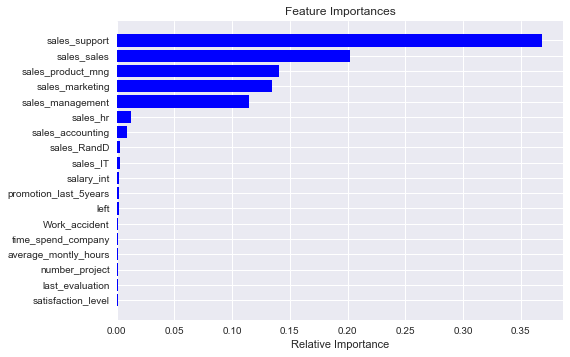

In [43]:
features = df_final.columns
importances = clf.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features) ## removed [indices]
plt.xlabel('Relative Importance')
plt.show()

### Using Logistic Regression for predection

In [49]:
from sklearn.linear_model import LogisticRegression

In [50]:
clf_lr = LogisticRegression()

In [51]:
clf_lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [52]:
y_pred = clf_lr.predict(X_test)

In [48]:
accuracy_score(y_test,y_pred)

0.78626262626262622